In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

from matplotlib import pyplot as plt


# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Upload preprocessed data
transcriptTransformRec = pd.read_pickle('processedData/dummy_v2.pkl')
profileClean = pd.read_pickle('processedData/profileClean_v1.pkl')
portfolioClean = pd.read_pickle('processedData/portfolioClean_v1.pkl')
transcriptCleanOld = pd.read_pickle('processedData/transcriptClean_v1.pkl')

In [2]:
transcriptTransformRec


,event,customer_id,amount,offer_id,reward,time_days,offer_completed,offer_viewed,offer_compViewed,offer_compNotViewed,compTransAmt,rewardReceived,adjRev,offerTrans
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0.00,1,1,1,0,19.89,5.0,14.89,37.67
1,offer received,a03223e636434f42ac4c3df47e8bac43,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.00,0,1,0,0,0.00,0.0,0.00,1.09
2,offer received,e2127556f4f64592b11af22de27a7932,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0.00,0,1,0,0,0.00,0.0,0.00,0.00
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,0.00,0,1,0,0,0.00,0.0,0.00,0.00
4,offer received,68617ca6246f4fbc85e91a2a49552598,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0.00,0,1,0,0,0.00,0.0,0.00,0.00
5,offer received,389bc3fa690240e798340f5a15918d5c,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,0.00,1,1,1,0,9.54,5.0,4.54,9.54
6,offer received,c4863c7985cf408faee930f111475da3,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,0.00,0,1,0,0,0.00,0.0,0.00,0.89
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0.00,0,0,0,0,0.00,0.0,0.00,0.00
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.00,0,1,0,0,0.00,0.0,0.00,12.33
9,offer received,31dda685af34476cad5bc968bdb01c53,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.00,0,1,0,0,0.00,0.0,0.00,0.00


In [3]:

# Get indices of completed offers
offerCompIdx = transcriptTransformRec[transcriptTransformRec.offer_completed == 1].index.tolist()
  
# Statistics describing the reward amounts
transcriptTransformRec[transcriptTransformRec.offer_completed == 1].compTransAmt.describe()

count    33631.000000
mean        22.497277
std         40.021525
min          0.590000
25%         12.680000
50%         18.460000
75%         24.950000
max       1015.730000
Name: compTransAmt, dtype: float64

In [4]:
# Statistics describing the reward amounts
transcriptTransformRec[transcriptTransformRec.offer_completed == 1].adjRev.describe()

count    33631.000000
mean        17.595579
std         40.007718
min         -4.000000
25%          8.270000
50%         13.550000
75%         20.130000
max       1005.730000
Name: adjRev, dtype: float64

Text(0.5,1,'Distribution of Completed Offer Transaction Revenue')

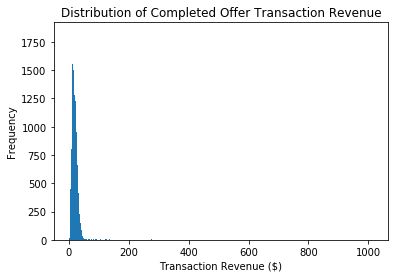

In [5]:

fig = plt.figure()
ax = transcriptTransformRec[transcriptTransformRec.offer_completed == 1].compTransAmt.plot.hist(bins=1000)
plt.xlabel('Transaction Revenue ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Completed Offer Transaction Revenue')


(0, 60)

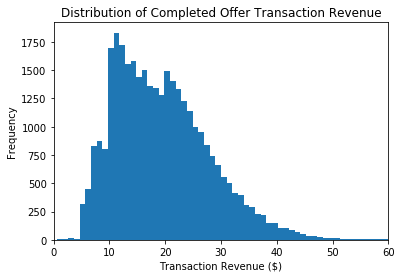

In [6]:
fig = plt.figure()
ax = transcriptTransformRec[transcriptTransformRec.offer_completed == 1].compTransAmt.plot.hist(bins=1000)
plt.xlabel('Transaction Revenue ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Completed Offer Transaction Revenue')
plt.xlim(0, 60)
     

Text(0.5,1,'Distribution of Transaction Amounts')

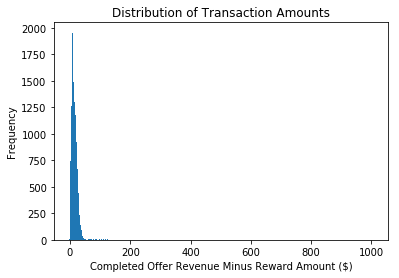

In [7]:

fig = plt.figure()
ax = transcriptTransformRec[transcriptTransformRec.offer_completed == 1].adjRev.plot.hist(bins=1000)
plt.xlabel('Completed Offer Revenue Minus Reward Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
     

### Additional Preprocessing


In [8]:
portfolio


,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [9]:

from sklearn import preprocessing

def normalizePorfolio(df):
    
    # Initialize a min-max scaler object
    #scaler = MinMaxScaler()
    
    normalized_df=(df-df.min())/(df.max()-df.min())

    return normalized_df

In [10]:
normalizeColumns = ['difficulty', 'duration', 'reward']

normalizedPorfolio = normalizePorfolio(portfolioClean[normalizeColumns])

In [11]:
normalizedPorfolio


,difficulty,duration,reward
0,0.50,0.571429,1.0
1,0.50,0.285714,1.0
2,0.00,0.142857,0.0
3,0.25,0.571429,0.5
4,1.00,1.000000,0.5
5,0.35,0.571429,0.3
6,0.50,1.000000,0.2
7,0.00,0.000000,0.0
8,0.25,0.285714,0.5
9,0.50,0.571429,0.2


In [12]:
# Create cleaned and normalized 'profile' dataset
portfolioClean[normalizeColumns] = normalizedPorfolio[normalizeColumns]

portfolioClean

,offer_id,difficulty,duration,reward,chan_social,chan_email,chan_web,chan_mobile,offerType,offer_type_bogo,offer_type_discount,offer_type_informational
0,ae264e3637204a6fb9bb56bc8210ddfd,0.50,0.571429,1.0,1,1,0,1,bogo,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,0.50,0.285714,1.0,1,1,1,1,bogo,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0.00,0.142857,0.0,0,1,1,1,informational,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.25,0.571429,0.5,0,1,1,1,bogo,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.00,1.000000,0.5,0,1,1,0,discount,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,0.35,0.571429,0.3,1,1,1,1,discount,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,0.50,1.000000,0.2,1,1,1,1,discount,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0.00,0.000000,0.0,1,1,0,1,informational,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,0.25,0.285714,0.5,1,1,1,1,bogo,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,0.50,0.571429,0.2,0,1,1,1,discount,0,1,0


### Merge Data


In [13]:
def merge_data(portfolio,profile,transcript):
    """
    Merge cleaned data frames for EDA
       
    Parameters
    ---------- 
    portfolio : cleaned portfolio data frame
    profile : cleaned profile data frame
    transcript : cleaned transcript data frame
      
    Returns
    -------
    merged_df: merged data frame
    
    """
    
    #merged_df = pd.merge(transcript, profile, on='customer_id')
    merged_df = pd.merge(portfolio, transcript, on='offer_id')
    merged_df = pd.merge(merged_df, profile, on='customer_id')
    
    return merged_df
     

In [14]:
merged_df = merge_data(portfolioClean,profileClean,transcriptTransformRec)

In [15]:
merged_df.head(5)


,offer_id,difficulty,duration,reward_x,chan_social,chan_email,chan_web,chan_mobile,offerType,offer_type_bogo,...,adjRev,offerTrans,age,income,joinDate,joinDate_month,joinDate_year,gender_F,gender_M,gender_O
0,ae264e3637204a6fb9bb56bc8210ddfd,0.5,0.571429,1.0,1,1,0,1,bogo,1,...,0.00,0.00,64,100000.0,2017-09-09,9,2017,0,1,0
1,ae264e3637204a6fb9bb56bc8210ddfd,0.5,0.571429,1.0,1,1,0,1,bogo,1,...,0.00,0.00,64,100000.0,2017-09-09,9,2017,0,1,0
2,ae264e3637204a6fb9bb56bc8210ddfd,0.5,0.571429,1.0,1,1,0,1,bogo,1,...,21.05,31.05,64,100000.0,2017-09-09,9,2017,0,1,0
3,ae264e3637204a6fb9bb56bc8210ddfd,0.5,0.571429,1.0,1,1,0,1,bogo,1,...,0.00,0.00,64,100000.0,2017-09-09,9,2017,0,1,0
4,ae264e3637204a6fb9bb56bc8210ddfd,0.5,0.571429,1.0,1,1,0,1,bogo,1,...,0.00,0.00,64,100000.0,2017-09-09,9,2017,0,1,0


### Drop columns not needed for training


In [16]:
# Get target variable for training
y = merged_df['offer_completed'].copy()
y

0         0
1         0
2         1
3         0
4         0
5         0
6         0
7         1
8         0
9         0
10        1
11        0
12        0
13        0
14        1
15        0
16        0
17        1
18        0
19        0
20        0
21        0
22        1
23        0
24        0
25        1
26        0
27        0
28        0
29        0
         ..
148775    0
148776    1
148777    0
148778    0
148779    0
148780    0
148781    1
148782    0
148783    1
148784    0
148785    1
148786    0
148787    0
148788    1
148789    0
148790    0
148791    1
148792    0
148793    0
148794    0
148795    0
148796    0
148797    0
148798    0
148799    0
148800    1
148801    0
148802    0
148803    1
148804    0
Name: offer_completed, Length: 148805, dtype: int64

In [17]:
mergedTrain_df = merged_df

print(mergedTrain_df.columns)

# Rename 'if' to 'customer_id'
mergedTrain_df.rename(columns={'reward_x': 'reward'}, inplace=True)

# Drop columns not needed for training
mergedTrain_df.drop(['offer_id', 'offerType', 'customer_id', 'event', 'amount', 'reward_y', 'time_days', 'joinDate', 'offer_completed',
       'offer_viewed', 'offer_compViewed', 'offer_compNotViewed',
       'compTransAmt', 'rewardReceived', 'adjRev', 'offerTrans'], axis=1, inplace=True)

X = mergedTrain_df.copy()

Index(['offer_id', 'difficulty', 'duration', 'reward_x', 'chan_social',
       'chan_email', 'chan_web', 'chan_mobile', 'offerType', 'offer_type_bogo',
       'offer_type_discount', 'offer_type_informational', 'event',
       'customer_id', 'amount', 'reward_y', 'time_days', 'offer_completed',
       'offer_viewed', 'offer_compViewed', 'offer_compNotViewed',
       'compTransAmt', 'rewardReceived', 'adjRev', 'offerTrans', 'age',
       'income', 'joinDate', 'joinDate_month', 'joinDate_year', 'gender_F',
       'gender_M', 'gender_O'],
      dtype='object')


In [18]:
# View mergedTrain_df
mergedTrain_df

,difficulty,duration,reward,chan_social,chan_email,chan_web,chan_mobile,offer_type_bogo,offer_type_discount,offer_type_informational,age,income,joinDate_month,joinDate_year,gender_F,gender_M,gender_O
0,0.50,0.571429,1.0,1,1,0,1,1,0,0,64,100000.0,9,2017,0,1,0
1,0.50,0.571429,1.0,1,1,0,1,1,0,0,64,100000.0,9,2017,0,1,0
2,0.50,0.571429,1.0,1,1,0,1,1,0,0,64,100000.0,9,2017,0,1,0
3,0.50,0.571429,1.0,1,1,0,1,1,0,0,64,100000.0,9,2017,0,1,0
4,0.50,0.571429,1.0,1,1,0,1,1,0,0,64,100000.0,9,2017,0,1,0
5,0.00,0.142857,0.0,0,1,1,1,0,0,1,64,100000.0,9,2017,0,1,0
6,0.00,0.142857,0.0,0,1,1,1,0,0,1,64,100000.0,9,2017,0,1,0
7,1.00,1.000000,0.5,0,1,1,0,0,1,0,64,100000.0,9,2017,0,1,0
8,1.00,1.000000,0.5,0,1,1,0,0,1,0,64,100000.0,9,2017,0,1,0
9,1.00,1.000000,0.5,0,1,1,0,0,1,0,64,100000.0,9,2017,0,1,0


In [19]:
X.to_pickle('processedData/dataOfferCompX.pkl')
y.to_pickle('processedData/dataOfferCompY.pkl')

### Define target and feature data

### Preparing and splitting the data


In [20]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# We split the dataset into 4/5 training and 1/5 testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# We split the dataset into 4/5 training and 1/5 testing sets.
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)

In [21]:
X_train


array([[ 0.        ,  0.14285714,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5       ,  0.57142857,  0.2       , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5       ,  1.        ,  0.2       , ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 0.5       ,  1.        ,  0.2       , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.35      ,  0.57142857,  0.3       , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.5       , ...,  0.        ,
         1.        ,  0.        ]])

In [22]:
Y_train


100931    0
113052    0
14664     0
60585     0
27431     0
52236     0
140225    0
95562     0
82908     0
40257     0
9411      0
41987     1
76424     1
124696    1
9695      1
19834     0
20127     0
109347    0
83495     0
25459     0
6791      0
87931     0
72975     0
121074    1
83159     0
45293     0
87119     0
133947    1
26477     0
61705     0
         ..
147210    0
51508     0
143965    0
116449    1
93436     1
119438    0
41494     0
4941      0
72385     1
9549      0
44296     0
60889     0
133117    0
113051    0
23044     0
68775     0
139083    0
56115     0
20606     1
699       0
129679    1
34687     0
116242    0
42336     0
140816    0
126806    0
45044     0
73468     1
32626     0
139837    0
Name: offer_completed, Length: 95235, dtype: int64

### Train model


### Train Model using a gradient boosting algorithm

The objective of this model is to use transaction, customer, and ad characteristic data to predict whether an offer is completed or not.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

# Skikit learn gradient boosting classifier
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
#    max_depth=1, random_state=0)

# XGBoost Classifier
clf = XGBClassifier()

clf.learning_rate = 0.1
clf.n_estimators = 500

In [24]:
clf.fit(X_train, Y_train)


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:01:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=500, n_jobs=1,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', use_label_encoder=True,
       validate_parameters=1, verbosity=None)

In [25]:
clf.score(X_test, Y_test)


0.77326030711333626

### Model Validation


In [26]:
from sklearn import svm

# Create a SVM classifier with linear kernel
clfSVM = svm.SVC(kernel="linear")

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


def calcROC(model, X, y):
  ''' Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. '''

  print("ROC AUC Score:: {0:.3f}".format(roc_auc_score(y, model.predict_proba(X)[:, 1])))
  print('\n')
  
    

In [28]:
def model_eval(model, X_train, Y_train, X_test, Y_test, X_val, Y_val):
  ''' Function to evaluate the performance and provide a classification report of the classifier model.'''
  
  print("Model Evaluation:\n")
  print(model)
  print('\n')
  print("Accuracy score (training): {0:.3f}".format(model.score(X_train, Y_train)))
  print("Accuracy score (test): {0:.3f}".format(model.score(X_test, Y_test)))
  print("Accuracy score (validation): {0:.3f}".format(model.score(X_val, Y_val)))

  predictions = model.predict(X_val)

  print('\n')
  print("Classification Report:")
  print(classification_report(Y_val, predictions))

  print('\n')

 
# Calculate the ROC Curve and AUC score for the model Classifier
  calcROC(model, X_val, Y_val)
  
    

In [29]:
model_eval(clf, X_train, Y_train, X_test, Y_test, X_val, Y_val)


Model Evaluation:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=500, n_jobs=1,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', use_label_encoder=True,
       validate_parameters=1, verbosity=None)


Accuracy score (training): 0.784
Accuracy score (test): 0.773
Accuracy score (validation): 0.777


Classification Report:
             precision    recall  f1-score   support

          0       0.78      0.99      0.87     18651
          1       0.07      0.00      0.00      5158

avg / total       0.63      0.78      0.69     23809



ROC AU

### Evaluate Classification Performance of Offers Completed Using k-Nearest Neighbors (kNN) Algorithm

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
kNN = KNeighborsClassifier(n_neighbors=23)

# Train KNN model
kNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [31]:
# Evaluate KNN model performance
model_eval(kNN, X_train, Y_train, X_test, Y_test, X_val, Y_val)

Model Evaluation:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')


Accuracy score (training): 0.782
Accuracy score (test): 0.777
Accuracy score (validation): 0.781


Classification Report:
             precision    recall  f1-score   support

          0       0.78      1.00      0.88     18651
          1       0.06      0.00      0.00      5158

avg / total       0.63      0.78      0.69     23809



ROC AUC Score:: 0.608




### Perform Logistic Regression as a baseline


In [32]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
logReg = LogisticRegression()
logReg.max_iter=250
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=250, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
model_eval(logReg, X_train, Y_train, X_test, Y_test, X_val, Y_val)


Model Evaluation:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=250, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Accuracy score (training): 0.782
Accuracy score (test): 0.780
Accuracy score (validation): 0.783


Classification Report:
             precision    recall  f1-score   support

          0       0.78      1.00      0.88     18651
          1       0.00      0.00      0.00      5158

avg / total       0.61      0.78      0.69     23809



ROC AUC Score:: 0.665




/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
